Importations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Les deux fonctions f :

In [5]:
def f_1d(x):
    return np.abs(x)

def f_2d(x, y):
    return np.abs(x) + np.abs(y)

Les deux fonctions g : 

In [6]:
def g_1d(x, xk, alpha):
    return f_1d(x) + (1 / (2 * alpha)) * (x - xk)**2

def g_2d(x, y, xk, yk, alpha):
    return f_2d(x, y) + (1 / (2 * alpha)) * ((x - xk)**2 + (y - yk)**2)

Gradient smooth

In [7]:
def gradient_smooth_part_1d(x, xk, alpha):
    return (1 / alpha) * (x - xk)

def gradient_smooth_part_2d(x, y, xk, yk, alpha):
    grad_x = (1 / alpha) * (x - xk)
    grad_y = (1 / alpha) * (y - yk)
    return grad_x, grad_y

L'operateur proximal (the soft thresholding operator): 

In [10]:

#Compute the proximal operator for f(x) = |x|; This is the soft thresholding operator; as seen in the course
def proximal_gradient_step_1d(xk, alpha):
    return np.sign(xk) * max(np.abs(xk) - alpha, 0)

# Opérateur proximal pour 2D
def proximal_gradient_step_2d(xk, yk, alpha):
    prox_x = np.sign(xk) * max(np.abs(xk) - alpha, 0)
    prox_y = np.sign(yk) * max(np.abs(yk) - alpha, 0)
    return prox_x, prox_y
    
# Descente de gradient proximal
def proximal_gradient_descent(x0, alpha, max_iter=100, tol=1e-6, dim=1):
    if dim == 1:
        x = x0
        trajectory = [x0]
        for _ in range(max_iter):
            x_prev = x
            grad_step = x - alpha * gradient_smooth_part_1d(x, x, alpha)
            x = proximal_gradient_step_1d(grad_step, alpha)
            trajectory.append(x)
            if np.abs(x - x_prev) < tol:
                print("Convergence after", len(trajectory), "iterations")
                break 
        return x, trajectory
    elif dim == 2:
        x, y = x0
        trajectory = [(x, y)]
        for _ in range(max_iter):
            x_prev, y_prev = x, y
            grad_x, grad_y = gradient_smooth_part_2d(x, y, x, y, alpha)
            grad_step_x = x - alpha * grad_x
            grad_step_y = y - alpha * grad_y
            x, y = proximal_gradient_step_2d(grad_step_x, grad_step_y, alpha)
            trajectory.append((x, y))
            if np.sqrt((x - x_prev)**2 + (y - y_prev)**2) < tol:
                break
        return (x, y), trajectory


Plot results : 

Convergence after 102 iterations


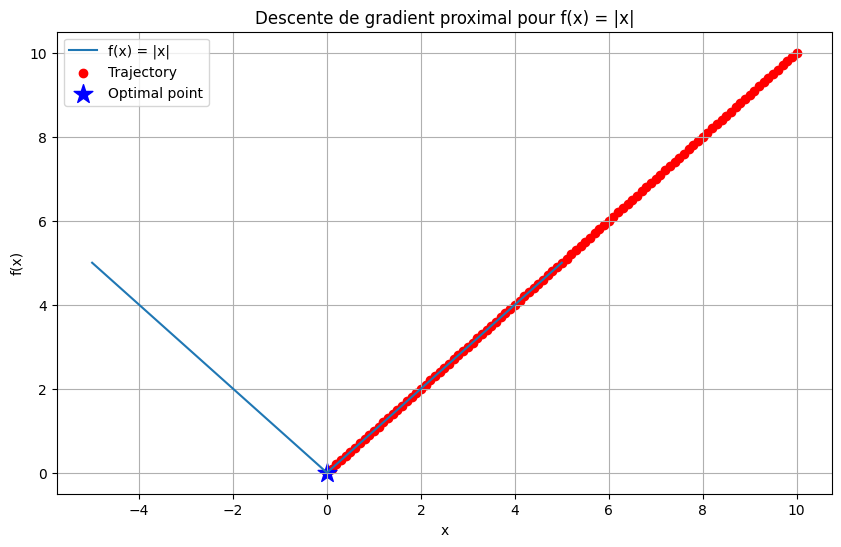

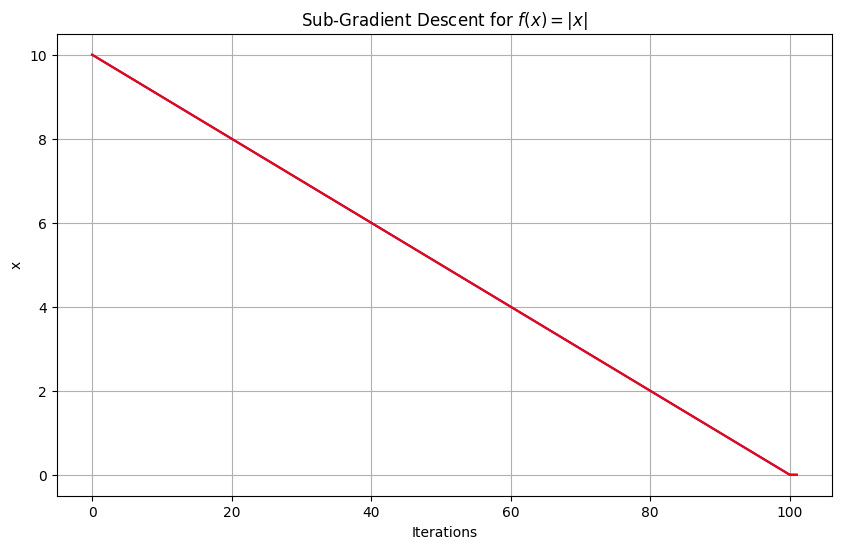

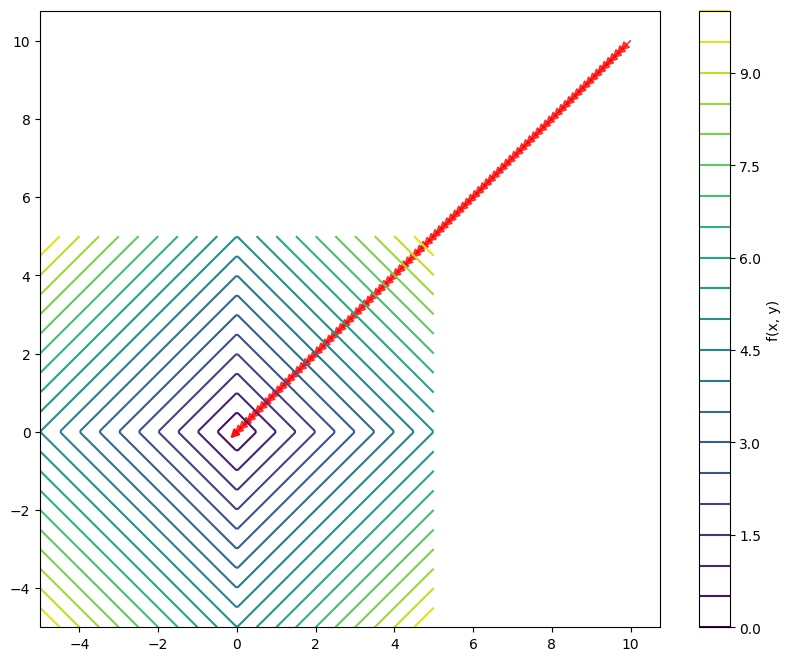

In [32]:
def plot_optimization_results(x0, alpha, num_iterations, dim=1):
    if dim == 1:
        final_x, trajectory = proximal_gradient_descent(x0, alpha, num_iterations, dim=1)
        x_values = np.linspace(-5, 5, 400)
        y_values = f_1d(x_values)
        
        plt.figure(figsize=(10, 6))
        plt.plot(x_values, y_values, label="f(x) = |x|")
        plt.scatter(trajectory, [f_1d(x) for x in trajectory], color='red', label="Trajectory")
        plt.scatter(final_x, f_1d(final_x), color='blue', marker='*', s=200, label="Optimal point")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.title("Descente de gradient proximal pour f(x) = |x|")
        plt.legend()
        plt.grid(True)
        plt.show()
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(trajectory)), trajectory, linestyle='-', color='b')
        plt.plot(range(len(trajectory)), trajectory, linestyle='-', color='r')
        plt.title("Sub-Gradient Descent for $f(x) = |x|$")
        plt.xlabel("Iterations")
        plt.ylabel("x")
        plt.grid()
        plt.show()
        
    elif dim == 2:
        final_point, trajectory = proximal_gradient_descent(x0, alpha, num_iterations, dim=2)
        trajectory = np.array(trajectory)
        x = np.linspace(-5, 5, 200)
        y = np.linspace(-5, 5, 200)
        X, Y = np.meshgrid(x, y)
        Z = f_2d(X, Y)
        
        plt.figure(figsize=(10, 8))
        contours = plt.contour(X, Y, Z, levels=20, cmap='viridis')
        plt.colorbar(contours, label='f(x, y)')
        for i in range(len(trajectory) - 1):
            plt.arrow(
                trajectory[i, 0], trajectory[i, 1],
                trajectory[i + 1, 0] - trajectory[i, 0],
                trajectory[i + 1, 1] - trajectory[i, 1],
                head_width=0.2, head_length=0.2, fc='red', ec='red', alpha=0.7
            )

alpha = 0.1
num_iterations = 200

# Pour f(x) = |x|
x0_1d = 10.0
plot_optimization_results(x0_1d, alpha, num_iterations, dim=1)

# Pour f(x, y) = |x| + |y|
x0_2d = (10.0, 10.0)
plot_optimization_results(x0_2d, alpha, num_iterations, dim=2)

Subgradient

In [38]:
# 1d function 
def sous_gradient(f, x0, max_iter=1000, tol=1e-6):
    x = x0
    path = [x]  
    alpha = 5
    for i in range(max_iter):
        learning_rate = alpha / (i+1)
    
        if x > 0:
            s = 1
        elif x < 0:
            s = -1
        else:  
            s = np.random.uniform(-1, 1) 
        
        x_new = x - learning_rate * (s/np.linalg.norm(s))
        
        if np.linalg.norm(x_new - x) < tol:
            print("Convergence after", len(path), "iterations")
            break
        
        x = x_new
        path.append(x)
    
    return path



In [39]:
def plot_convergence_2d(paths):
    """Affiche les chemins de convergence pour chaque méthode d'optimisation en 2D avec des lignes de niveau."""
    fig, ax = plt.subplots(figsize=(8, 6))

    # Créer un espace 2D pour visualiser les trajectoires
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = X**2 + 1.41*X*Y + Y**2  # Fonction en 2D dans l’espace x-y

    # Contours de niveau
    contour = ax.contour(X, Y, Z, levels=20, cmap="viridis")
    ax.clabel(contour, inline=True, fontsize=8)

    # Ajouter les trajectoires de chaque méthode
    for path in paths:
        x_vals = [p[0] for p in path]
        y_vals = [p[1] for p in path]
        ax.plot(x_vals, y_vals, marker='o', linestyle='-')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.set_title("Convergence Paths of Different Optimization Methods (2D Contour Plot)")
    plt.show()



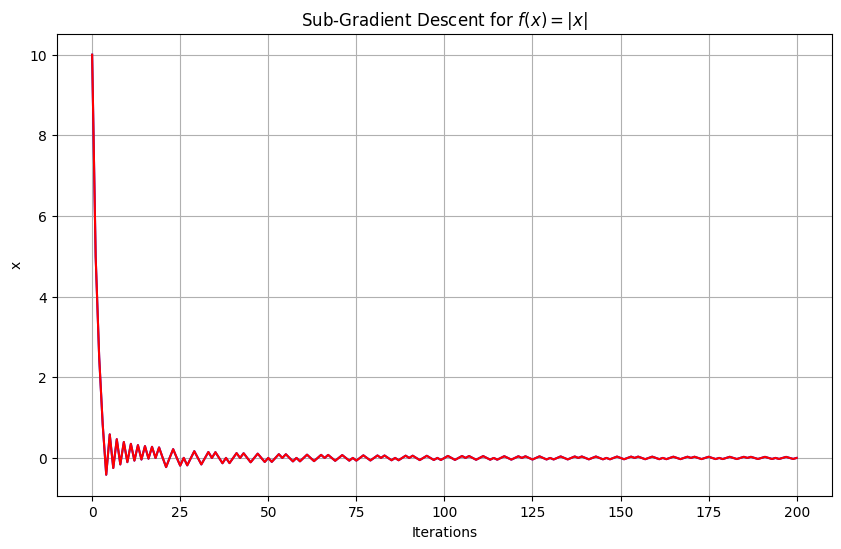

In [40]:
x0 = 10 
max_iter = 200
tol = 1e-6
f = lambda x: abs(x) 

path = sous_gradient(f, x0, max_iter=max_iter, tol=tol)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(path)), path, linestyle='-', color='b')
plt.plot(range(len(path)), path, linestyle='-', color='r')
plt.title("Sub-Gradient Descent for $f(x) = |x|$")
plt.xlabel("Iterations")
plt.ylabel("x")
plt.grid()
plt.show()

